In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix

In [10]:
filepath = 'data/Churn_Modelling.csv'
df = pd.read_csv(filepath, encoding = "ISO-8859-1")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


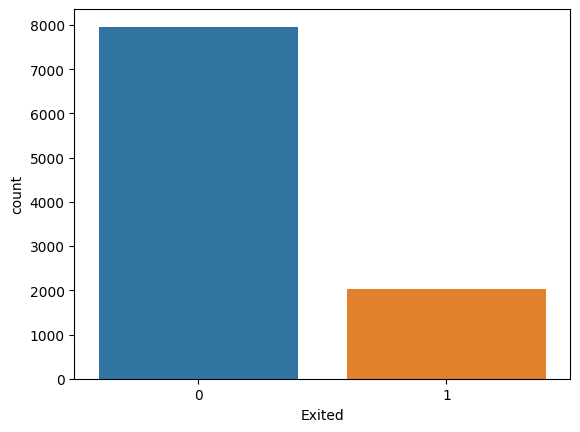

In [11]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    sns.countplot(x='Exited', data=df)

In [12]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

In [13]:
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = np.array(df['Exited'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.fit_transform(X_test) 


In [34]:
clf = RandomForestClassifier()
clf.fit(X_train_std, y_train)

RandomForestClassifier()

In [35]:
print("The accuracy on test data is", round(clf.score(X_test_std, y_test), 4))
predicted = clf.predict(X_test_std)

The accuracy on test data is 0.867


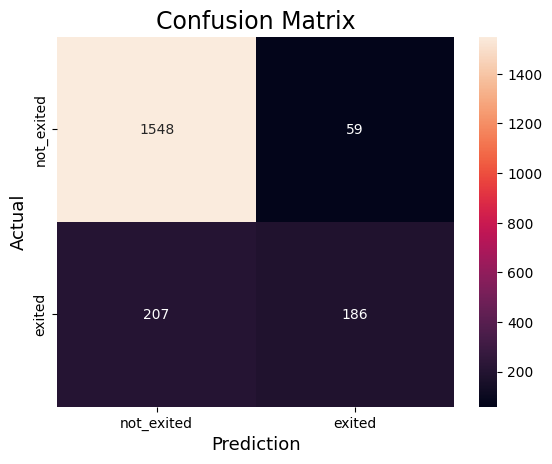

In [41]:
cm = confusion_matrix(y_test,predicted)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['not_exited','exited'],
            yticklabels=['not_exited','exited'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()